In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# #Reading libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# #Loading the Datasets

In [45]:
train = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
test = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
sample = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")

# # Checking the heads of each dataset to get rough idea about them 

In [4]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [5]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [6]:
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


# # Checking the shape of each dataset

In [7]:
train.shape, movies.shape, test.shape

((162758, 5), (143258, 14), (55315, 4))

# Checking the info of each dataset for getting the no of rows,null values,datatype of each columns

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


# Checking the null values in every column of each dataset which we need to handle

In [11]:
train.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [12]:
test.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [13]:
movies.isnull().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

# # checking for duplicates in movieid column and dropping as we are using it as primary key to merge movies dataset with the train and test dataset

In [46]:
duplicates = movies.duplicated(subset='movieid',keep='first').sum()
print(duplicates)
movies.drop_duplicates(subset='movieid', keep='first', inplace=True)

16854


In [15]:
movies.shape

(126404, 14)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126404 entries, 0 to 143256
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               126404 non-null  object 
 1   title                 126404 non-null  object 
 2   audienceScore         63714 non-null   float64
 3   rating                11778 non-null   object 
 4   ratingContents        11778 non-null   object 
 5   releaseDateTheaters   26390 non-null   object 
 6   releaseDateStreaming  69273 non-null   object 
 7   runtimeMinutes        113910 non-null  float64
 8   genre                 116401 non-null  object 
 9   originalLanguage      114020 non-null  object 
 10  director              126404 non-null  object 
 11  boxOffice             12528 non-null   object 
 12  distributor           19549 non-null   object 
 13  soundType             13466 non-null   object 
dtypes: float64(2), object(12)
memory usage: 14.5+ MB


# #merging movies dataset with the train and test datasets

In [47]:
merged_train=pd.merge(train, movies, on='movieid', how='left')
merged_test=pd.merge(test, movies, on='movieid', how='left')

# # checking shape of the merged movies dataset with train and test dataset

In [18]:
merged_train.shape,merged_test.shape

((162758, 18), (55315, 17))

# # checking null values in merged movies dataset with train dataset

In [19]:
merged_train.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

# There are many null values in many columns which we will need to handle

# # filling the reviewtext column with empty string 

In [20]:
merged_train['reviewText'].fillna('', inplace=True)
merged_test['reviewText'].fillna('', inplace=True)

# #Frequency Distribution of Word Counts in Review Texts

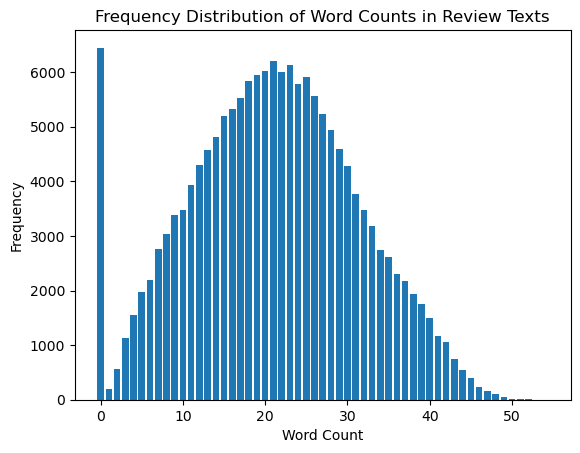

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_train is your DataFrame and 'reviewtext' is the column with review text
word_counts = merged_train['reviewText'].apply(lambda x: len(x.split()))

# Calculate frequency of each word count
word_count_freq = word_counts.value_counts()

# Plotting a bar graph
plt.bar(word_count_freq.index, word_count_freq.values)

# Adding labels and title
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Word Counts in Review Texts')

# Display the plot
plt.show()


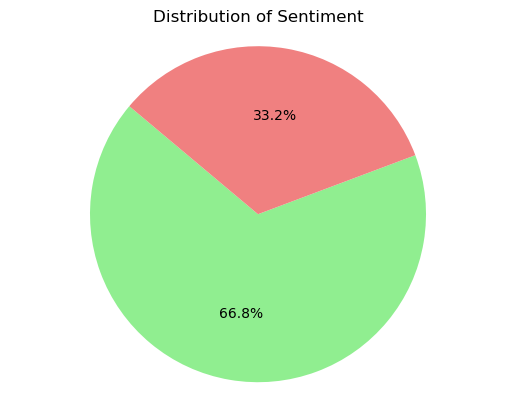

In [22]:
import matplotlib.pyplot as plt

value_counts = merged_train['sentiment'].value_counts()
sizes = value_counts.values
colors = ['lightgreen', 'lightcoral']  
# Creating the pie chart
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Sentiment')

# Equal aspect ratio ensures that the pie chart is circular.
plt.axis('equal')

plt.show()


# #The positive reviews are 67% of the total sentiment, and hence we had got the score of 0.668 with dummy classifier submission

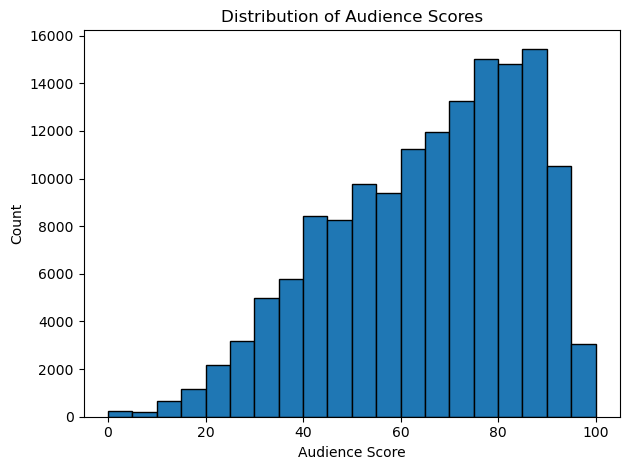

In [24]:
audience_scores = merged_train['audienceScore']

# Plotting a histogram with 20 bins
plt.hist(audience_scores, bins=20, edgecolor='black')

# Adding labels and title
plt.xlabel('Audience Score')
plt.ylabel('Count')
plt.title('Distribution of Audience Scores')

# Display the plot
plt.tight_layout()
plt.show()

# The audience scoring keeps on increasing till 90 and then falls

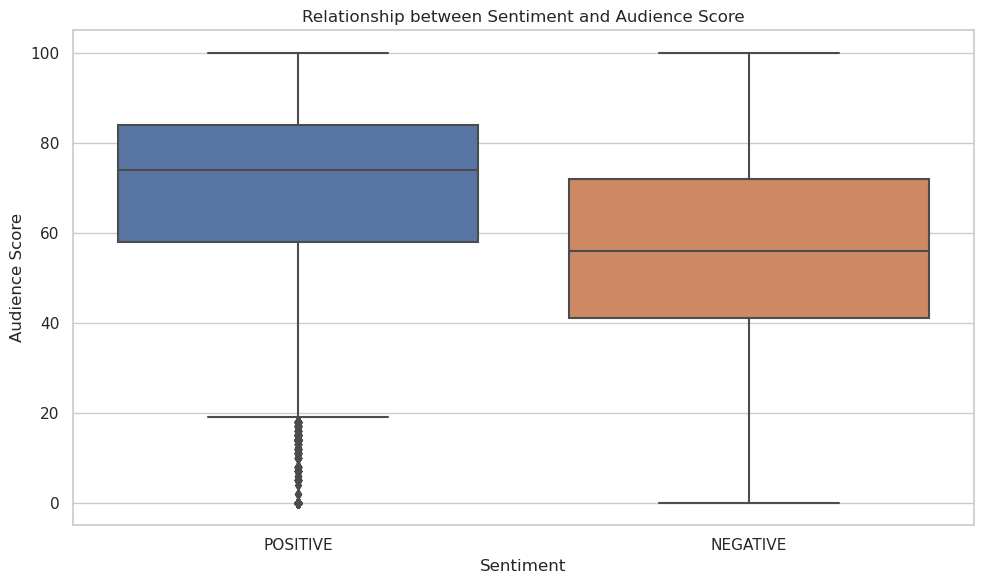

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed

# Create a box plot
sns.boxplot(x='sentiment', y='audienceScore', data=merged_train)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.title('Relationship between Sentiment and Audience Score')

# Display the plot
plt.tight_layout()
plt.show()


# # there are many outliers,so have used robust scaler which gave better score

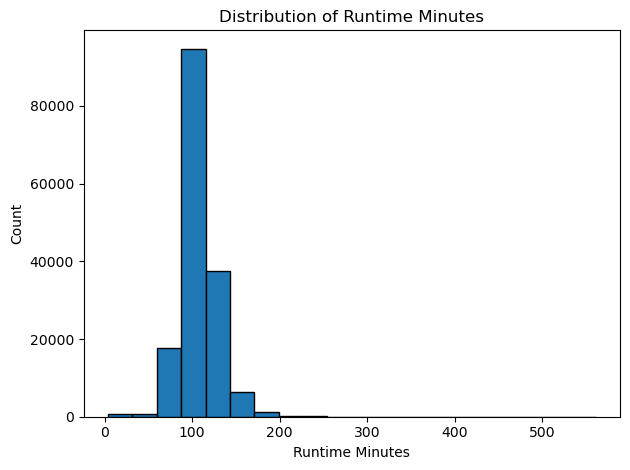

In [25]:
audience_scores = merged_train['runtimeMinutes']

# Plotting a histogram with 20 bins
plt.hist(audience_scores, bins=20, edgecolor='black')

# Adding labels and title
plt.xlabel('Runtime Minutes')
plt.ylabel('Count')
plt.title('Distribution of Runtime Minutes')

# Display the plot
plt.tight_layout()
plt.show()

# #Most movies have runtime of 100-150 minutes

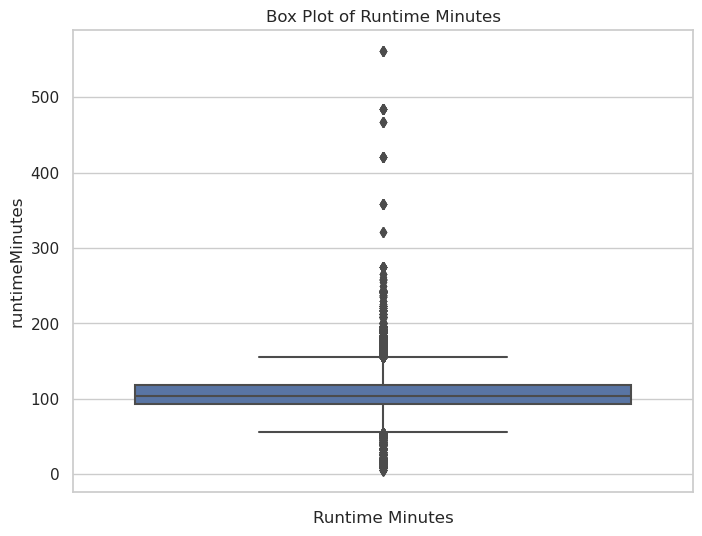

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) 
sns.boxplot(data=merged_train, y='runtimeMinutes')
plt.xlabel('Runtime Minutes')
plt.title('Box Plot of Runtime Minutes')
plt.show()


# there are many outliers,so have used robust scaler which gave better score

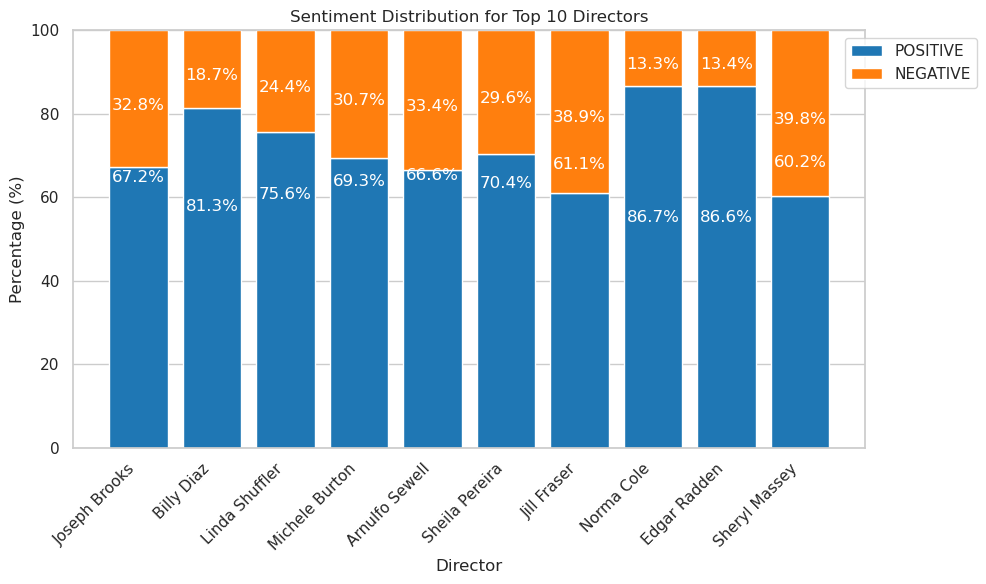

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_train is your DataFrame
director_counts = merged_train['director'].value_counts().head(10)

# Group data by 'director' and 'sentiment', then calculate the count
director_sentiment_counts = merged_train.groupby(['director', 'sentiment']).size().unstack().fillna(0)

# Selecting only the top 10 directors
top_directors = director_counts.index
director_sentiment_counts = director_sentiment_counts.loc[top_directors]

# Calculate the total count for each director
director_total_counts = director_sentiment_counts.sum(axis=1)

# Calculate the percentage distribution
percentage_distribution = director_sentiment_counts.divide(director_total_counts, axis=0) * 100

# Plotting a stacked bar chart with percentage labels
x = np.arange(len(top_directors))
bottom = np.zeros(len(top_directors))
spacing = 1.5  # Adjust this value to control the spacing between labels

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed


for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
    ax.bar(x, percentage_distribution.loc[top_directors, sentiment], bottom=bottom, label=sentiment, color=colors[i])
    bottom += percentage_distribution.loc[top_directors, sentiment]

# Adding percentage labels on top of the bars with spacing
for i, director in enumerate(top_directors):
    for j, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
        label = f'{percentage_distribution.loc[director, sentiment]:.1f}%'
        plt.text(i, bottom[i] - (percentage_distribution.loc[director, sentiment] / 2) - spacing, label, ha='center', va='center', color='white')

# Adding labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Percentage (%)')
ax.set_title('Sentiment Distribution for Top 10 Directors')
ax.set_xticks(x)
ax.set_xticklabels(top_directors, rotation=45, ha='right')

# Move the legend to the side
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.ylim(0, 100)  # Adjust y-axis limit to accommodate value count labels
plt.show()


# #The distribution of top directors with most movies and the associated sentiment

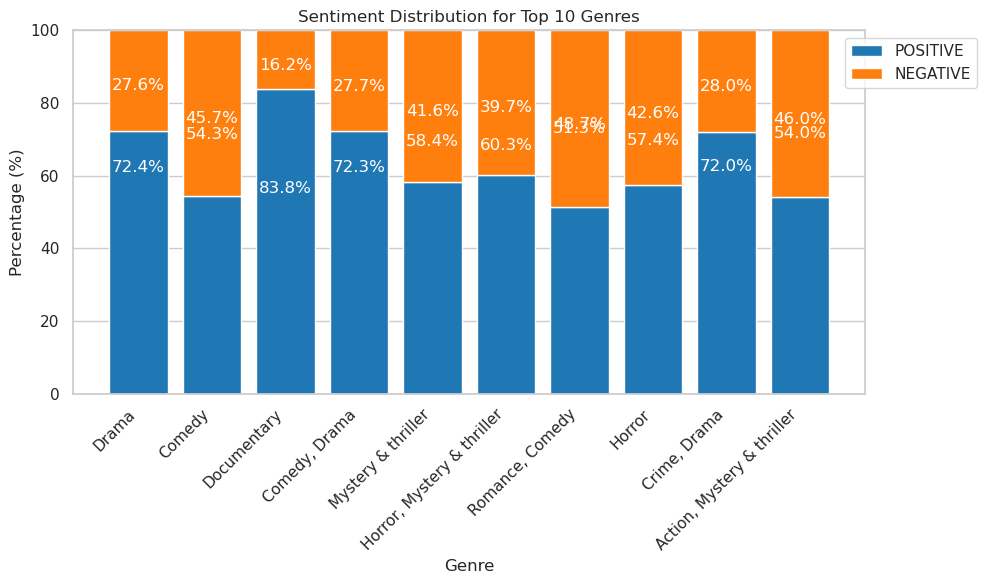

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_train is your DataFrame
genre_counts = merged_train['genre'].value_counts().head(10)

# Group data by 'genre' and 'sentiment', then calculate the count
genre_sentiment_counts = merged_train.groupby(['genre', 'sentiment']).size().unstack().fillna(0)

# Selecting only the top 10 genres
top_genres = genre_counts.index
genre_sentiment_counts = genre_sentiment_counts.loc[top_genres]

# Calculate the total count for each genre
genre_total_counts = genre_sentiment_counts.sum(axis=1)

# Calculate the percentage distribution
percentage_distribution = genre_sentiment_counts.divide(genre_total_counts, axis=0) * 100

# Plotting a stacked bar chart with percentage labels
x = np.arange(len(top_genres))
bottom = np.zeros(len(top_genres))
spacing = 1.5  # Adjust this value to control the spacing between labels

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Define colors for positive and negative sentiments
colors = ['#1f77b4', '#ff7f0e']

for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
    ax.bar(x, percentage_distribution.loc[top_genres, sentiment], bottom=bottom, label=sentiment, color=colors[i])
    bottom += percentage_distribution.loc[top_genres, sentiment]

# Adding percentage labels on top of the bars with spacing
for i, genre in enumerate(top_genres):
    for j, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
        label = f'{percentage_distribution.loc[genre, sentiment]:.1f}%'
        plt.text(i, bottom[i] - (percentage_distribution.loc[genre, sentiment] / 2) - spacing, label, ha='center', va='center', color='white')

# Adding labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Percentage (%)')
ax.set_title('Sentiment Distribution for Top 10 Genres')
ax.set_xticks(x)
ax.set_xticklabels(top_genres, rotation=45, ha='right')

# Move the legend to the side
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.ylim(0, 100)  # Adjust y-axis limit to accommodate value count labels
plt.show()


# The distribution of top genres and the associated sentiment

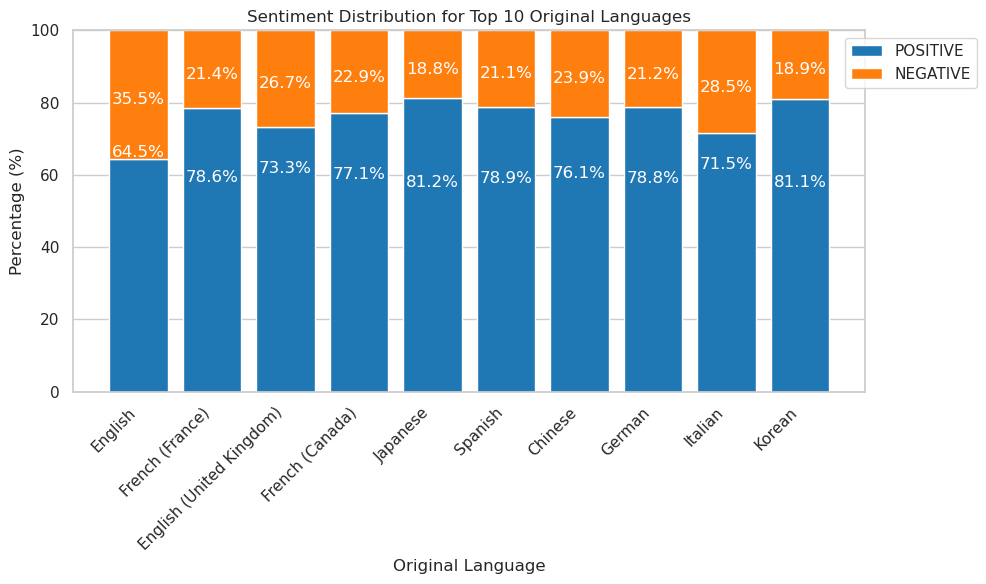

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_train is your DataFrame
language_counts = merged_train['originalLanguage'].value_counts().head(10)

# Group data by 'originalLanguage' and 'sentiment', then calculate the count
language_sentiment_counts = merged_train.groupby(['originalLanguage', 'sentiment']).size().unstack().fillna(0)

# Selecting only the top 10 original languages
top_languages = language_counts.index
language_sentiment_counts = language_sentiment_counts.loc[top_languages]

# Calculate the total count for each language
language_total_counts = language_sentiment_counts.sum(axis=1)

# Calculate the percentage distribution
percentage_distribution = language_sentiment_counts.divide(language_total_counts, axis=0) * 100

# Plotting a stacked bar chart with percentage labels
x = np.arange(len(top_languages))
bottom = np.zeros(len(top_languages))
spacing = 1.5  # Adjust this value to control the spacing between labels

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Define colors for positive and negative sentiments
colors = ['#1f77b4', '#ff7f0e']

for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
    ax.bar(x, percentage_distribution.loc[top_languages, sentiment], bottom=bottom, label=sentiment, color=colors[i])
    bottom += percentage_distribution.loc[top_languages, sentiment]

# Adding percentage labels on top of the bars with spacing
for i, language in enumerate(top_languages):
    for j, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
        label = f'{percentage_distribution.loc[language, sentiment]:.1f}%'
        plt.text(i, bottom[i] - (percentage_distribution.loc[language, sentiment] / 2) - spacing, label, ha='center', va='center', color='white')

# Adding labels and title
ax.set_xlabel('Original Language')
ax.set_ylabel('Percentage (%)')
ax.set_title('Sentiment Distribution for Top 10 Original Languages')
ax.set_xticks(x)
ax.set_xticklabels(top_languages, rotation=45, ha='right')

# Move the legend to the side
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.ylim(0, 100)  # Adjust y-axis limit to accommodate value count labels
plt.show()


# The distribution of top original languages and the associated sentiment

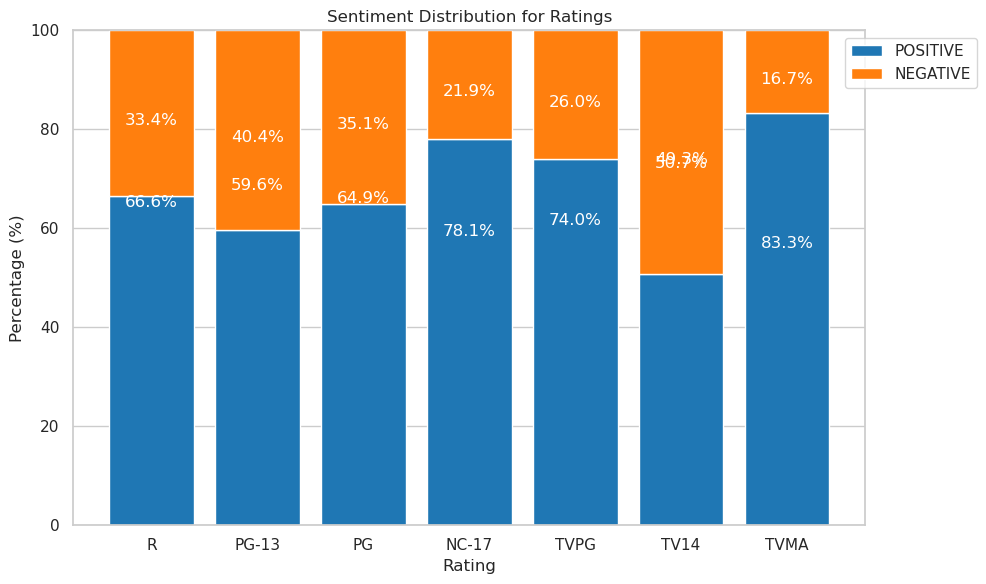

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_train is your DataFrame
rating_counts = merged_train['rating'].value_counts()

# Group data by 'rating' and 'sentiment', then calculate the count
rating_sentiment_counts = merged_train.groupby(['rating', 'sentiment']).size().unstack().fillna(0)

# Calculate the total count for each rating
rating_total_counts = rating_sentiment_counts.sum(axis=1)

# Calculate the percentage distribution
percentage_distribution = rating_sentiment_counts.divide(rating_total_counts, axis=0) * 100

# Plotting a stacked bar chart with percentage labels
x = np.arange(len(rating_counts))
bottom = np.zeros(len(rating_counts))
spacing = 1.5  # Adjust this value to control the spacing between labels

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed


for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
    ax.bar(x, percentage_distribution.loc[rating_counts.index, sentiment], bottom=bottom, label=sentiment, color=colors[i])
    bottom += percentage_distribution.loc[rating_counts.index, sentiment]

# Adding percentage labels on top of the bars with spacing
for i, rating in enumerate(rating_counts.index):
    for j, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
        label = f'{percentage_distribution.loc[rating, sentiment]:.1f}%'
        plt.text(i, bottom[i] - (percentage_distribution.loc[rating, sentiment] / 2) - spacing, label, ha='center', va='center', color='white')

# Adding labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Percentage (%)')
ax.set_title('Sentiment Distribution for Ratings')
ax.set_xticks(x)
ax.set_xticklabels(rating_counts.index, rotation=0, ha='center')

# Move the legend to the side
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()
plt.ylim(0, 100)  # Adjust y-axis limit to accommodate value count labels
plt.show()


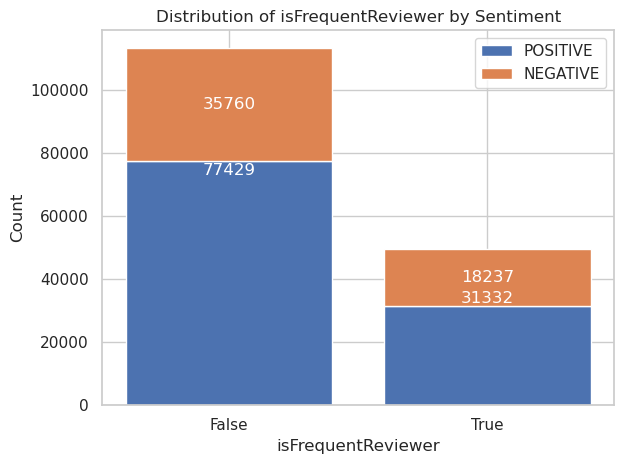

In [57]:
import matplotlib.pyplot as plt

value_counts = merged_train.groupby(['isFrequentReviewer', 'sentiment']).size().unstack()

# Plotting a stacked bar graph
fig, ax = plt.subplots()

bottom = [0, 0]
for sentiment in ['POSITIVE', 'NEGATIVE']:
    ax.bar(['False', 'True'], value_counts[sentiment], bottom=bottom, label=sentiment)
    bottom += value_counts[sentiment]

# Adding labels and title
plt.xlabel('isFrequentReviewer')
plt.ylabel('Count')
plt.title('Distribution of isFrequentReviewer by Sentiment')
plt.legend()

# Adding count labels on top of the bars
for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE']):
    for j, count in enumerate(value_counts[sentiment]):
        plt.text(j, bottom[j] - (value_counts[sentiment][j] / 2), f'{count}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


# #converting boolean datatype of isFrequentReviewer into int type and naming isTopCritic from test dataset to isFrequentReviwer to match with the train dataset

In [28]:
merged_train['isFrequentReviewer']= merged_train['isFrequentReviewer'].astype(int)
merged_test['isFrequentReviewer']= merged_test['isTopCritic'].astype(int)

# # converting sentiment column from train dataset into target label 

In [29]:
y=merged_train['sentiment']
X=merged_train.drop('sentiment', axis=1)

# # Performing Imputation on all columns with appropriate technique to remove null values

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Sample data (replace this with your actual data)
X = pd.DataFrame(X)  # Your DataFrame here

# Define the transformer list
transformer_list = [
    ('mean', SimpleImputer(missing_values=np.nan, strategy='mean'), ['audienceScore', 'runtimeMinutes']),
    ('most_freq', SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
     ['originalLanguage', 'rating', 'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming', 'genre', 'boxOffice', 'distributor', 'soundType'])
]

# Create a ColumnTransformer
ct = ColumnTransformer(transformers=transformer_list, remainder='passthrough', verbose_feature_names_out=False)



# Fit and transform the data using the pipeline
merged_train_clean = pd.DataFrame(ct.fit_transform(X), columns=ct.get_feature_names_out())
merged_test_clean = pd.DataFrame(ct.transform(merged_test), columns=ct.get_feature_names_out())

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(merged_train_clean,y, test_size=0.2, random_state=1)

# #Performing Feature encoding,extraction using appropriate technique for desired columns and then performing model training 

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer
scaler = StandardScaler()
tfvect= TfidfVectorizer()
rbsc = RobustScaler()
minmax= MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer([('audience', rbsc, ['audienceScore']),
                        ('runtime', rbsc, ['runtimeMinutes']),
                        ('text', tfvect, 'reviewText'),
                        ('name', tfvect, 'reviewerName'),
                        ('movieid', ohe, ['movieid']),
                        ('rating', ohe, ['rating']),
                        ('director', tfvect, 'director'),
                        ('genre', tfvect, 'genre'),
                        ('originalLanguage', ohe, ['originalLanguage']),
                        ('isFrequent', ohe, ['isFrequentReviewer'])], verbose=True)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

[ColumnTransformer] ..... (1 of 10) Processing audience, total=   0.0s
[ColumnTransformer] ...... (2 of 10) Processing runtime, total=   0.0s
[ColumnTransformer] ......... (3 of 10) Processing text, total=   2.6s
[ColumnTransformer] ......... (4 of 10) Processing name, total=   0.5s
[ColumnTransformer] ...... (5 of 10) Processing movieid, total=   0.1s
[ColumnTransformer] ....... (6 of 10) Processing rating, total=   0.0s
[ColumnTransformer] ..... (7 of 10) Processing director, total=   0.6s
[ColumnTransformer] ........ (8 of 10) Processing genre, total=   0.5s
[ColumnTransformer]  (9 of 10) Processing originalLanguage, total=   0.0s
[ColumnTransformer] .. (10 of 10) Processing isFrequent, total=   0.0s


Train Score: 0.9072162573153311
Test Score: 0.831592528876874
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.77      0.70      0.73     10737
    POSITIVE       0.86      0.90      0.88     21815

    accuracy                           0.83     32552
   macro avg       0.81      0.80      0.80     32552
weighted avg       0.83      0.83      0.83     32552

Confusion Matrix:
[[ 7523  3214]
 [ 2268 19547]]


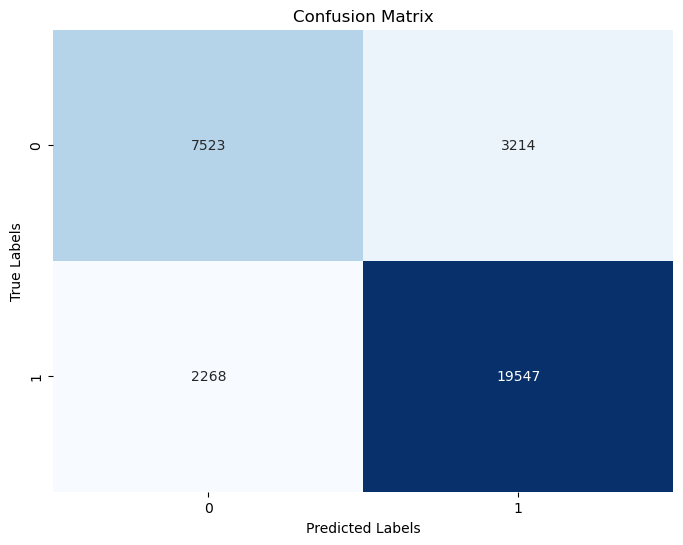

In [33]:
from sklearn.ensemble import  VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = LinearSVC(max_iter=1500)
clf3 = BernoulliNB()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train_transformed, y_train)

train_score1 = eclf1.score(X_train_transformed, y_train)
test_score1 = eclf1.score(X_test_transformed,y_test)
print("Train Score:", train_score1)
print("Test Score:", test_score1)

y_pred1 = eclf1.predict(X_test_transformed)
# print(eclf1.predict(X_test_transformed))
report = classification_report(y_test, y_pred1)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Best Logistic Regression Parameters: {'solver': 'saga', 'C': 1}
Best LinearSVC Parameters: {'loss': 'squared_hinge', 'C': 0.1}
Best BernoulliNB Parameters: {'alpha': 1.0}
Train Score: 0.8912569313242094
Test Score: 0.8317154091914475
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.69      0.73     10737
    POSITIVE       0.85      0.90      0.88     21815

    accuracy                           0.83     32552
   macro avg       0.82      0.79      0.80     32552
weighted avg       0.83      0.83      0.83     32552

Confusion Matrix:
[[ 7356  3381]
 [ 2097 19718]]


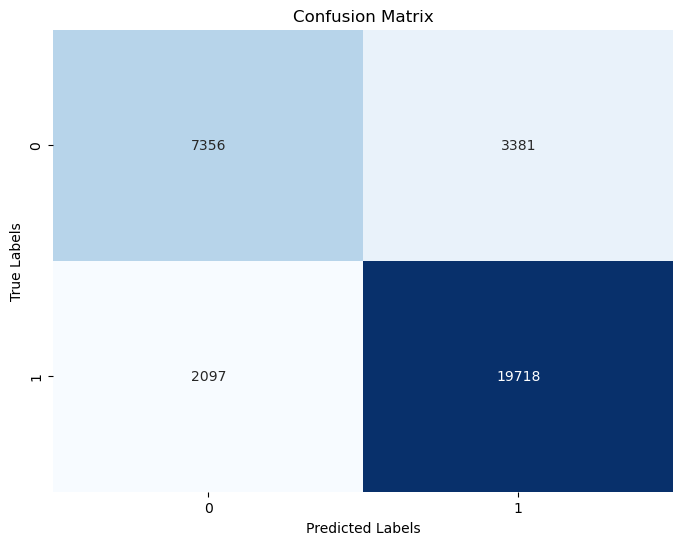

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import  VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
# Define parameter grids for each classifier
param_grid_lr = {
    'C': [ 0.1, 1, 10],
    'solver': [ 'saga', 'sag']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# Perform RandomizedSearchCV for each classifier
rs_lr = RandomizedSearchCV(estimator=LogisticRegression(multi_class='multinomial', random_state=1),
                           param_distributions=param_grid_lr,
                           n_iter=10, random_state=1, cv=5)

rs_svc = RandomizedSearchCV(estimator=LinearSVC(max_iter=1500),
                            param_distributions=param_grid_svc,
                            n_iter=10, random_state=1, cv=5)

rs_nb = RandomizedSearchCV(estimator=BernoulliNB(),
                           param_distributions=param_grid_nb,
                           n_iter=10, random_state=1, cv=5)

# Fit the RandomizedSearchCV on each classifier
rs_lr.fit(X_train_transformed, y_train)
rs_svc.fit(X_train_transformed, y_train)
rs_nb.fit(X_train_transformed, y_train)

# Get the best hyperparameters for each classifier
best_params_lr = rs_lr.best_params_
best_params_svc = rs_svc.best_params_
best_params_nb = rs_nb.best_params_

# Create classifiers with the best hyperparameters
best_clf1 = LogisticRegression(multi_class='multinomial', random_state=1, **best_params_lr)
best_clf2 = LinearSVC(max_iter=1500, **best_params_svc)
best_clf3 = BernoulliNB(**best_params_nb)

# Create the VotingClassifier with the best classifiers
best_eclf = VotingClassifier(estimators=[
    ('lr', best_clf1), ('svc', best_clf2), ('nb', best_clf3)],
    voting='hard')

# Fit the VotingClassifier on the training data
best_eclf.fit(X_train_transformed, y_train)

# Predict on the test data
y_pred2 = best_eclf.predict(X_test_transformed)


# Print best parameters for each classifier
print("Best Logistic Regression Parameters:", best_params_lr)
print("Best LinearSVC Parameters:", best_params_svc)
print("Best BernoulliNB Parameters:", best_params_nb)

# Calculate and print accuracy scores
train_score2=best_eclf.score(X_train_transformed, y_train)
test_score2 = best_eclf.score(X_test_transformed,y_test)
print("Train Score:", train_score2)
print("Test Score:", test_score2)


report = classification_report(y_test, y_pred2)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Accuracy and Scores:

The training score of 0.8912 and the test score of 0.8317 indicate that the model is performing relatively well on the test data but might be slightly overfitting since the training score is notably higher.

# Precision, Recall, and F1-Score:

The precision for the POSITIVE class is 0.85, which means that when the model predicts a sample as POSITIVE, it is correct 85% of the time. The precision for the NEGATIVE class is 0.78.

The recall for the POSITIVE class is 0.90, indicating that the model is capturing 90% of all actual positive samples. The recall for the NEGATIVE class is 0.69.

F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1-score for the POSITIVE class is 0.88, while for the NEGATIVE class, it's 0.73.


Train Score: 0.8955808488088106
Test Score: 0.8310088473826494
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.68      0.73     10737
    POSITIVE       0.85      0.90      0.88     21815

    accuracy                           0.83     32552
   macro avg       0.81      0.79      0.80     32552
weighted avg       0.83      0.83      0.83     32552

Confusion Matrix:
[[ 7354  3383]
 [ 2118 19697]]


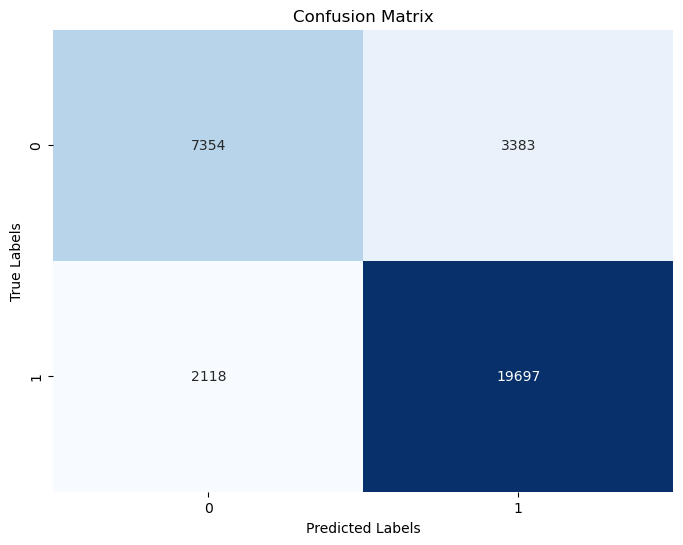

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lgrg= LogisticRegression(max_iter=1500, random_state=52,penalty='l2', C= 1.26, tol=1e-7,solver='sag')
lgrg.fit(X_train_transformed,y_train)
train_score3=lgrg.score(X_train_transformed, y_train)
test_score3 = lgrg.score(X_test_transformed,y_test)
y_pred = lgrg.predict(X_test_transformed)
print("Train Score:", train_score3)
print("Test Score:", test_score3)

y_pred3 = lgrg.predict(X_test_transformed)
report = classification_report(y_test, y_pred3)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Train Score: 0.941730795815861
Test Score: 0.818659375768002
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.68      0.73     10737
    POSITIVE       0.85      0.90      0.88     21815

    accuracy                           0.83     32552
   macro avg       0.81      0.79      0.80     32552
weighted avg       0.83      0.83      0.83     32552

Confusion Matrix:
[[ 7354  3383]
 [ 2118 19697]]


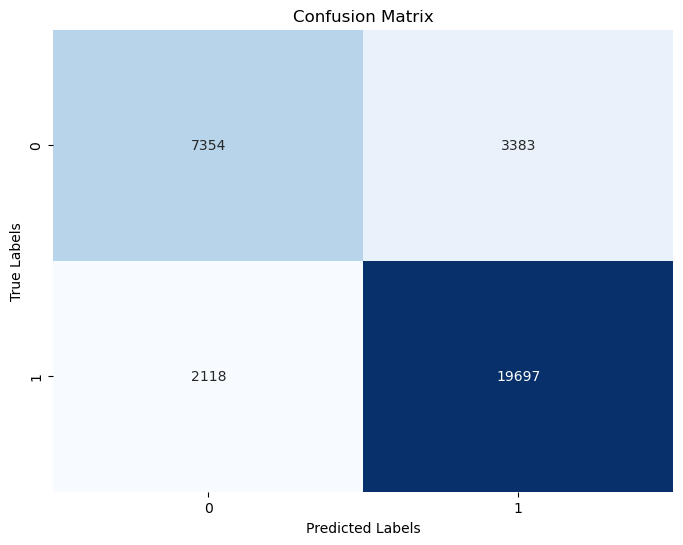

In [36]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report
svc = LinearSVC(max_iter=1500,random_state=1)
svc.fit(X_train_transformed, y_train)
train_score4=svc.score(X_train_transformed, y_train)
test_score4 = svc.score(X_test_transformed,y_test)
y_pred = svc.predict(X_test_transformed)
print("Train Score:", train_score4)
print("Test Score:", test_score4)


y_pred4 = lgrg.predict(X_test_transformed)
report = classification_report(y_test, y_pred4)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [37]:
model_scores = {
    'Model': ['VotingClassifier', 'with HPT', 'LogisticRegression', 'Linear SVC'],
    'Train Score': [0.9072, 0.8912, 0.8955, 0.9417],
    'Test Score': [0.8315, 0.8317, 0.8310, 0.8186]
}
ms = pd.DataFrame(model_scores)
print(ms)

                Model  Train Score  Test Score
0    VotingClassifier       0.9072      0.8315
1            with HPT       0.8912      0.8317
2  LogisticRegression       0.8955      0.8310
3          Linear SVC       0.9417      0.8186


In [38]:
final_test = ct.transform(merged_test_clean)

In [39]:
prediction = pd.DataFrame(best_eclf.predict(final_test), columns=['sentiment'])
sub= prediction

sub.index.name = 'id'
sub.to_csv("submission.csv", encoding='utf-8')

In [40]:
sub

,sentiment
id,
0,POSITIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE
...,...
55310,POSITIVE
55311,POSITIVE
55312,NEGATIVE
